In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bikes.csv')
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [3]:
df.shape

(7857, 8)

In [4]:
df.price.describe

<bound method NDFrame.describe of 0        63500
1       115000
2       300000
3       100000
4       197500
         ...  
7852     55000
7853     28000
7854     61740
7855     49000
7856     65000
Name: price, Length: 7857, dtype: int64>

<AxesSubplot:xlabel='price', ylabel='Count'>

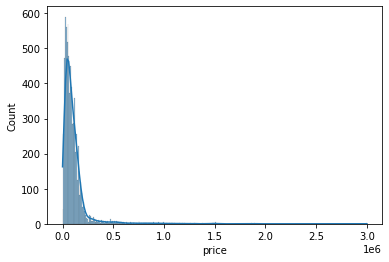

In [5]:
sns.histplot(df.price,kde=True)

In [6]:
mean=df.price.mean()

In [7]:
mean

106791.33689703449

In [8]:
std_deviation=df.price.std()

In [9]:
std_deviation

138926.12462775948

In [10]:
mean - 138926*std_deviation

-19300343998.699215

In [11]:
mean+138926*std_deviation

19300557581.373013

In [12]:
df[(df.price<-19300343998.699215)|(df.price>19300557581.373013)]

,model_name,model_year,kms_driven,owner,location,mileage,power,price


In [13]:
df_no_outlier = df[(df.price<19300557581.373013)&(df.price>-19300343998.699215)]
df_no_outlier.shape

(7857, 8)

In [14]:
df.head(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [15]:
df['z_score'] = (df.price-df.price.mean())/df.price.std()

In [16]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,z_score
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,-0.311614
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,0.059087
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,1.390730
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,-0.048885
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,0.652927


In [17]:
df.price.mean()

106791.33689703449

In [18]:
df.price.std()

138926.12462775948

In [19]:
df[df.z_score>1]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,z_score
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,1.390730
155,TVS Apache RR310 BS6 2020,2020,450 Km,first owner,hyderabad,\n\n 22 kmpl,33 bhp,263000,1.124401
167,KTM RC 390cc 2020,2020,930 Km,first owner,hyderabad,\n\n 26kmpl,42.30 bhp,290000,1.318749
197,TVS Apache RR310 BS6 2021,2021,3500 Km,first owner,delhi,\n\n 22 kmpl,33 bhp,249000,1.023628
393,Bajaj Avenger Street 150 2016,2016,16470 Km,first owner,pune,\n\n 50 kmpl,14.30 bhp,550000,3.190247
...,...,...,...,...,...,...,...,...,...
7373,Harley-Davidson Street 750 2015,2015,14116 Km,second owner,ahmedabad,\n\n 20 kmpl,47 bhp,325000,1.570681
7378,Harley-Davidson Street 750 2015,2015,5800 Km,second owner,ambala,\n\n 20 kmpl,47 bhp,280000,1.246768
7379,Triumph Tiger 800XC 2014,2014,18259 Km,first owner,jaipur,\n\n 21 kmpl,93.70 bhp,600000,3.550151
7383,Kawasaki Z800 2017,2017,12000 Km,first owner,surat,\n\n 16 kmpl,111 bhp,650000,3.910054


In [20]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [21]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

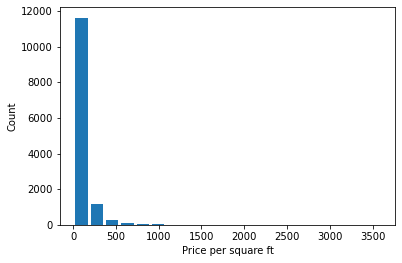

In [22]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

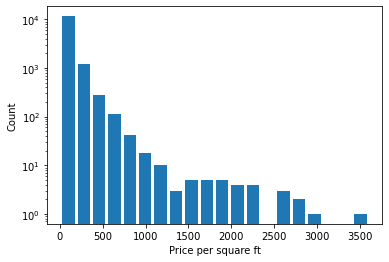

In [23]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [24]:
lower_limit, upper_limit = df.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(11.159500000000001, 2000.0)

In [25]:
outliers = df[(df.price>upper_limit) | (df.price<lower_limit)]
outliers.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8653,Plot Area,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
7482,Super built-up Area,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
13200,Plot Area,Ready To Move,Defence Colony,6 Bedroom,NaN,8000,6.0,3.0,2800.00
942,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.00
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,NaN,7150,13.0,NaN,3600.00
11945,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,10.25
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
10304,Plot Area,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.00


In [26]:
df2 = df[(df.price<upper_limit) & (df.price>lower_limit)]
df2.shape

(13291, 9)

In [27]:
df.shape

(13320, 9)

In [28]:
df.shape[0] - df2.shape[0]

29

In [29]:
max_limit = df2.price.mean() + 4*df2.price.std()
min_limit = df2.price.mean() - 4*df2.price.std()
max_limit, min_limit

(611.7477497493906, -391.72702820849855)

In [30]:
df2[(df2.price>max_limit) | (df2.price<min_limit)].sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
9535,Plot Area,Ready To Move,Indira Nagar,4 Bedroom,NaN,2400,5.0,NaN,1250.0
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
4195,Super built-up Area,Ready To Move,Defence Colony,4 BHK,Masta A,6600,4.0,NaN,986.0
9546,Plot Area,Ready To Move,Yemlur,5 Bedroom,Epllan,10000,5.0,NaN,1950.0
6274,Plot Area,18-Mar,2nd Block Koramangala,7 Bedroom,NaN,5400,5.0,NaN,972.0
5711,Plot Area,18-Apr,2nd Block Jayanagar,4 Bedroom,NaN,4920,5.0,2.0,1150.0
9703,Plot Area,Ready To Move,Judicial Layout,5 Bedroom,NaN,5400,4.0,NaN,700.0
7022,Super built-up Area,Ready To Move,Sadashiva Nagar,3 BHK,NaN,3761,3.0,2.0,650.0
9343,Plot Area,Ready To Move,Mahalakshmi Layout,9 Bedroom,NaN,4320,7.0,2.0,821.0
4403,Plot Area,Ready To Move,Doddanekundi,4 Bedroom,NaN,3250,5.0,1.0,850.0


In [31]:
df3 = df2[(df2.price>min_limit) & (df2.price<max_limit)]
df3.shape


(13144, 9)

In [32]:
df2.shape[0]-df3.shape[0]

147

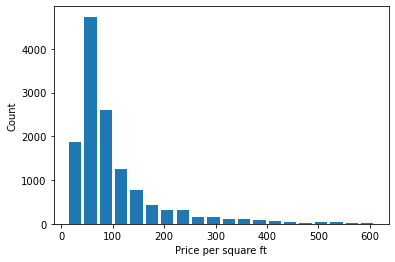

In [33]:
plt.hist(df3.price, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

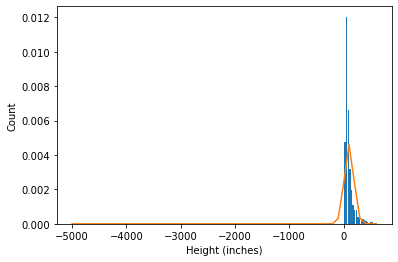

In [34]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price.mean(),df3.price.std()))

In [35]:
df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()
df2.sample(10)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12212/3205300212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price-df2.price.mean())/df2.price.std()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
38,Super built-up Area,Ready To Move,Chikkalasandra,3 BHK,NaN,1290,2.0,2.0,56.120,-0.429630
424,Built-up Area,Ready To Move,Hoodi,2 BHK,Dhgraas,985,2.0,2.0,67.000,-0.342891
12789,Plot Area,Ready To Move,"Beml layout, Rajarajeshwari nagar",4 Bedroom,NaN,1200,5.0,NaN,325.000,1.713961
9713,Super built-up Area,Ready To Move,Marathahalli,3 BHK,Cilip J,1315,2.0,2.0,60.000,-0.398698
10223,Plot Area,Ready To Move,Frazer Town,5 Bedroom,NaN,2801.25,4.0,1.0,462.000,2.806166
5014,Super built-up Area,Ready To Move,Thigalarapalya,2 BHK,Prtanha,1418,2.0,2.0,104.000,-0.047916
12126,Super built-up Area,Ready To Move,2nd Block Bel Layout,3 BHK,NaN,1625,3.0,3.0,92.000,-0.143584
10576,Built-up Area,Ready To Move,Electronic City,1 RK,GMown E,550,1.0,1.0,27.000,-0.661783
12161,Super built-up Area,19-Dec,Kanakapura,1 BHK,GoityEt,712 - 938,1.0,0.0,35.475,-0.594218
6445,Built-up Area,Ready To Move,Amruthnagar,2 BHK,NaN,1150,2.0,1.0,48.000,-0.494365


In [36]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(147, 10)

In [37]:
outliers_z.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
9954,Plot Area,Ready To Move,Indira Nagar,5 Bedroom,NaN,2400,5.0,2.0,700.0,4.703573
12987,Plot Area,Ready To Move,Dodsworth Layout,6 Bedroom,NaN,30400,4.0,2.0,1824.0,13.664436
2657,Super built-up Area,Ready To Move,Benson Town,4 BHK,NaN,4460,5.0,NaN,650.0,4.304958
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0,4.703573
12742,Super built-up Area,18-Mar,Vasanth nagar,4 BHK,Prian E,4750,6.0,1.0,948.0,6.680703


In [38]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13144, 10)

In [39]:
df2.shape[0] - df4.shape[0]

147

In [40]:
df2.shape

(13291, 10)

In [41]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,zscore
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.565558
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.079640
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.382753
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.119667
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.470448


In [42]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [43]:
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [44]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [45]:
min_thresold, max_thresold = df.price.quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [46]:
df[df.price<min_thresold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [47]:
df2.price.describe()

count    13291.000000
mean       110.010361
std        125.434347
min         11.500000
25%         50.000000
50%         72.000000
75%        120.000000
max       1950.000000
Name: price, dtype: float64

In [48]:
df['price'][5]=np.NaN

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12212/2296393421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][5]=np.NaN
C:\Users\ASUS\OneDrive\Documents\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2


In [50]:
df.price.mean()

152.71972021106885

In [51]:
df_new = df.fillna(df.price.mean())
df_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,152.71972,152.71972,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,152.71972,152.71972,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,152.71972,152.71972,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,152.71972,152.71972,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,152.71972,152.71972,6,2


In [52]:
df_new = df.fillna(df.price.median())
df_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,106.0,106.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,106.0,106.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,106.0,106.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,106.0,106.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,106.0,106.00,6,2


In [53]:
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,106.0,106.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [54]:
df.price.quantile(0.25)

69.0

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np

In [56]:
df = pd.read_csv(
    'AB_NYC_2019.csv', 
    index_col=None, 
    names=["price","count"], 
    skiprows=1
)
df.head()

,,,,,,,,,,,,,,price,count
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


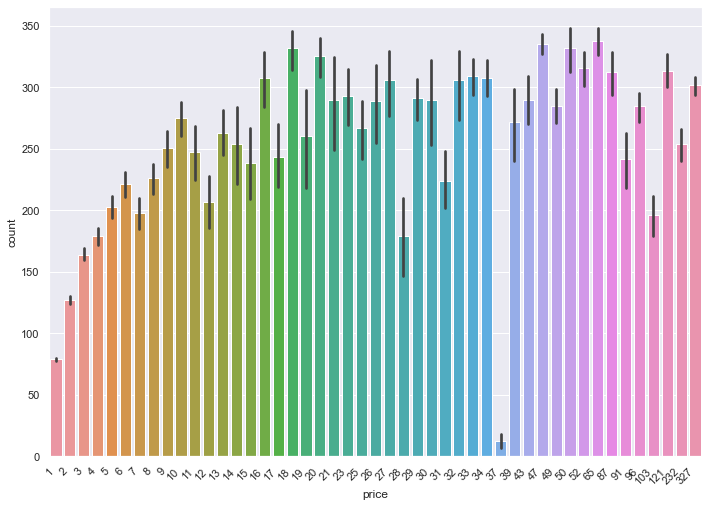

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='price',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

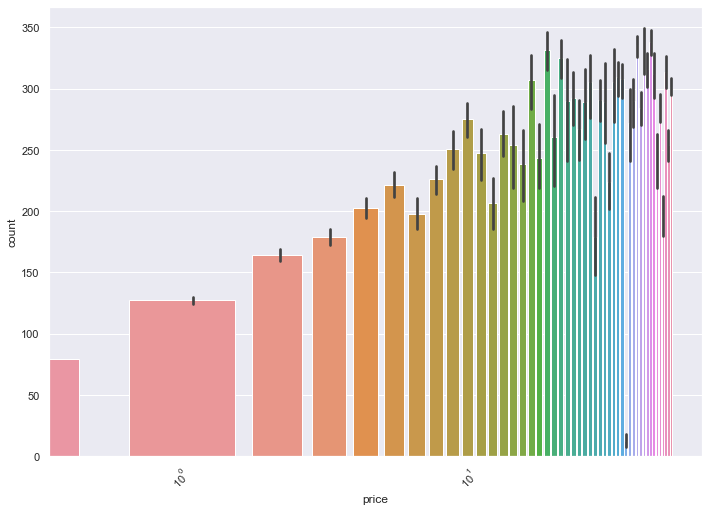

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='price',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');
g.set(xscale="log");

C:\Users\ASUS\OneDrive\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

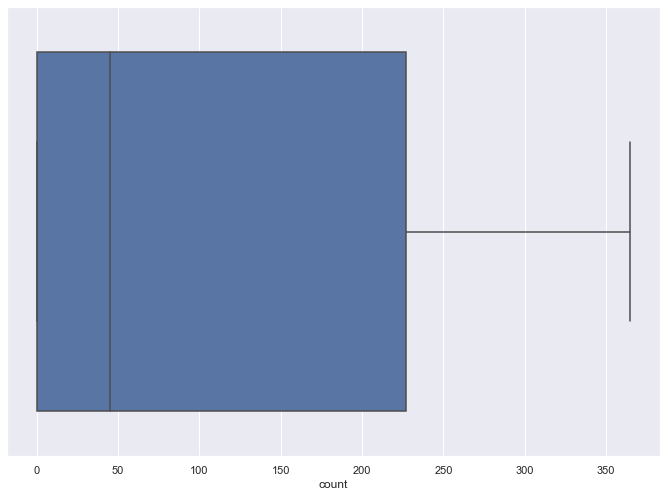

In [61]:
sns.boxplot(df['count'])

In [65]:
from scipy.stats import norm
import numpy as np

In [76]:
data_start = 2
data_end = 6
data_point = 6
data = np.linspace(data_start,data_end,data_point)
mean = np.mean(data)
std = np.std(data)

p=norm.pdf(3, loc=mean, scale=std)
print(p)

0.22338180743546038


In [77]:
print(std)

1.3662601021279466


In [78]:
print(mean)

4.0


In [79]:
px=data_start/data_point
print(px)

0.3333333333333333
